In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 7
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.01
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[7_10_51_300_0.01_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[7_10_51_300_0.01_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1084.9216

Best Fitness:	760.2964
Solution:	700.0000
Diff:		60.2964

[0:00:05][----------] 1.96% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1075.8830

Best Fitness:	747.4880
Solution:	700.0000
Diff:		47.4880

[0:00:11][----------] 3.92% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1123.5727

Best Fitness:	809.3203
Solution:	700.0000
Diff:		109.3203

[0:00:16][#---------] 5.88% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1077.7068

Best Fitness:	757.0655
Solution:	700.0000
Diff:		57.0655

[0:00:21][#---------] 7.84% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1089.6904

Best Fitness:	767.5306
Solution:	700.0000
Diff:		67.5306

[0:00:26][#---------] 9.80% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1092.4009

Best Fitness:	743.8302
Solution:	700.0000
Diff:		43.8302

[0:00:31][#---------] 11.76% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1097.5649

Best Fitness:	763.2177
Solution:	700.0000
Diff:		63.2177

[0:00:35][#---------] 13.73% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1086.7220

Best Fitness:	760.4685
Solution:	700.0000
Diff:		60.4685

[0:00:40][##--------] 15.69% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1081.9875

Best Fitness:	768.6778
Solution:	700.0000
Diff:		68.6778

[0:00:44][##--------] 17.65% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1100.5285

Best Fitness:	804.9498
Solution:	700.0000
Diff:		104.9498

[0:00:49][##--------] 19.61% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1118.8182

Best Fitness:	744.2082
Solution:	700.0000
Diff:		44.2082

[0:00:53][##--------] 21.57% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1108.1588

Best Fitness:	772.7760
Solution:	700.0000
Diff:		72.7760

[0:00:58][##--------] 23.53% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1105.8903

Best Fitness:	762.3410
Solution:	700.0000
Diff:		62.3410

[0:01:02][###-------] 25.49% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1110.0362

Best Fitness:	805.3361
Solution:	700.0000
Diff:		105.3361

[0:01:05][###-------] 27.45% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1093.5753

Best Fitness:	753.6978
Solution:	700.0000
Diff:		53.6978

[0:01:07][###-------] 29.41% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1103.6649

Best Fitness:	758.5204
Solution:	700.0000
Diff:		58.5204

[0:01:08][###-------] 31.37% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1127.0585

Best Fitness:	776.8784
Solution:	700.0000
Diff:		76.8784

[0:01:10][###-------] 33.33% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1087.2820

Best Fitness:	763.9480
Solution:	700.0000
Diff:		63.9480

[0:01:12][####------] 35.29% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1086.4568

Best Fitness:	789.8643
Solution:	700.0000
Diff:		89.8643

[0:01:14][####------] 37.25% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1110.4544

Best Fitness:	773.8323
Solution:	700.0000
Diff:		73.8323

[0:01:16][####------] 39.22% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1092.9230

Best Fitness:	791.0997
Solution:	700.0000
Diff:		91.0997

[0:01:18][####------] 41.18% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1088.7207

Best Fitness:	771.7951
Solution:	700.0000
Diff:		71.7951

[0:01:19][####------] 43.14% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1068.6951

Best Fitness:	719.5623
Solution:	700.0000
Diff:		19.5623

[0:01:21][#####-----] 45.10% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1086.8496

Best Fitness:	757.7507
Solution:	700.0000
Diff:		57.7507

[0:01:23][#####-----] 47.06% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1100.4569

Best Fitness:	756.4158
Solution:	700.0000
Diff:		56.4158

[0:01:25][#####-----] 49.02% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1098.3304

Best Fitness:	770.1752
Solution:	700.0000
Diff:		70.1752

[0:01:27][#####-----] 50.98% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1075.8522

Best Fitness:	760.1064
Solution:	700.0000
Diff:		60.1064

[0:01:28][#####-----] 52.94% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1097.0243

Best Fitness:	747.5440
Solution:	700.0000
Diff:		47.5440

[0:01:30][#####-----] 54.90% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1095.9958

Best Fitness:	789.2518
Solution:	700.0000
Diff:		89.2518

[0:01:32][######----] 56.86% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1111.7288

Best Fitness:	778.9184
Solution:	700.0000
Diff:		78.9184

[0:01:34][######----] 58.82% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1114.9662

Best Fitness:	754.4578
Solution:	700.0000
Diff:		54.4578

[0:01:35][######----] 60.78% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1101.8850

Best Fitness:	770.2342
Solution:	700.0000
Diff:		70.2342

[0:01:37][######----] 62.75% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1107.2880

Best Fitness:	773.2346
Solution:	700.0000
Diff:		73.2346

[0:01:39][######----] 64.71% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1104.1107

Best Fitness:	780.5007
Solution:	700.0000
Diff:		80.5007

[0:01:40][#######---] 66.67% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1102.9241

Best Fitness:	761.0962
Solution:	700.0000
Diff:		61.0962

[0:01:42][#######---] 68.63% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1077.0079

Best Fitness:	736.8028
Solution:	700.0000
Diff:		36.8028

[0:01:44][#######---] 70.59% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1100.1546

Best Fitness:	767.8452
Solution:	700.0000
Diff:		67.8452

[0:01:46][#######---] 72.55% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1120.9499

Best Fitness:	769.7054
Solution:	700.0000
Diff:		69.7054

[0:01:47][#######---] 74.51% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1101.2227

Best Fitness:	811.5588
Solution:	700.0000
Diff:		111.5588

[0:01:49][########--] 76.47% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1108.6677

Best Fitness:	789.3514
Solution:	700.0000
Diff:		89.3514

[0:01:51][########--] 78.43% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1107.1806

Best Fitness:	781.4852
Solution:	700.0000
Diff:		81.4852

[0:01:53][########--] 80.39% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1099.7927

Best Fitness:	759.0367
Solution:	700.0000
Diff:		59.0367

[0:01:55][########--] 82.35% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1111.6960

Best Fitness:	768.3232
Solution:	700.0000
Diff:		68.3232

[0:01:56][########--] 84.31% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1105.7339

Best Fitness:	793.0408
Solution:	700.0000
Diff:		93.0408

[0:01:58][#########-] 86.27% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1079.3876

Best Fitness:	782.2203
Solution:	700.0000
Diff:		82.2203

[0:02:00][#########-] 88.24% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1084.7605

Best Fitness:	775.7881
Solution:	700.0000
Diff:		75.7881

[0:02:01][#########-] 90.20% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1088.8493

Best Fitness:	799.2650
Solution:	700.0000
Diff:		99.2650

[0:02:03][#########-] 92.16% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1049.9306

Best Fitness:	760.0956
Solution:	700.0000
Diff:		60.0956

[0:02:05][#########-] 94.12% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1109.9717

Best Fitness:	781.8254
Solution:	700.0000
Diff:		81.8254

[0:02:07][##########] 96.08% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1109.1741

Best Fitness:	821.1144
Solution:	700.0000
Diff:		121.1144

[0:02:08][##########] 98.04% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1109.4652

Best Fitness:	784.5261
Solution:	700.0000
Diff:		84.5261

[0:02:10][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

0:02:10

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
0,120.347201,161.847411,173.782911,213.186228,216.508406,222.267343,192.812805,106.788801,291.123616,301.351277,...,1112.493348,1012.044370,1271.838485,822.748174,505.551633,1155.026978,1343.477818,478.889128,585.064864,50
1,120.347201,161.847411,173.782911,213.186228,203.585696,222.267343,192.812805,106.788801,291.123616,301.351277,...,1112.493348,463.360198,352.652682,279.233331,505.551633,780.244078,235.740928,478.889128,567.560369,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 60.29635957294056

Best error for run 1: 47.48800116655218

Best error for run 2: 109.32027027428148

Best error for run 3: 57.065527686865835

Best error for run 4: 67.53061819140567

Best error for run 5: 43.83020003626291

Best error for run 6: 63.217684992225145

Best error for run 7: 60.46848167310566

Best error for run 8: 68.67782028905685

Best error for run 9: 104.9497959973753

Best error for run 10: 44.2081524356031

Best error for run 11: 72.77602410260386

Best error for run 12: 62.34101819241732

Best error for run 13: 105.33610022877667

Best error for run 14: 53.69775762990787

Best error for run 15: 58.5203719830688

Best error for run 16: 76.87840598220555

Best error for run 17: 63.94797090568795

Best error for run 18: 89.86434901652342

Best error for run 19: 73.83230180099054

Best error for run 20: 91.0997475846525

Best error for run 21: 71.795142070917

Best error for run 22: 19.562273401517928

Best error for run 23: 57.750722803496274

Best error for run 24: 56.41582490829933

Best error for run 25: 70.1752090800104

Best error for run 26: 60.10640066026576

Best error for run 27: 47.54399424184567

Best error for run 28: 89.2518311431345

Best error for run 29: 78.91838322032925

Best error for run 30: 54.45782588909094

Best error for run 31: 70.23421501134851

Best error for run 32: 73.23463937581141

Best error for run 33: 80.5007141427418

Best error for run 34: 61.09620799486174

Best error for run 35: 36.802797841998995

Best error for run 36: 67.84517040124751

Best error for run 37: 69.70541369839123

Best error for run 38: 111.55878356323035

Best error for run 39: 89.35144281420958

Best error for run 40: 81.48522074505127

Best error for run 41: 59.036723209209526

Best error for run 42: 68.32323058152474

Best error for run 43: 93.0408445513782

Best error for run 44: 82.2203168424428

Best error for run 45: 75.78808697363331

Best error for run 46: 99.26497884093283

Best error for run 47: 60.0956082403934

Best error for run 48: 81.82540377678117

Best error for run 49: 121.11435927039076

Best error for run 50: 84.52612091848107

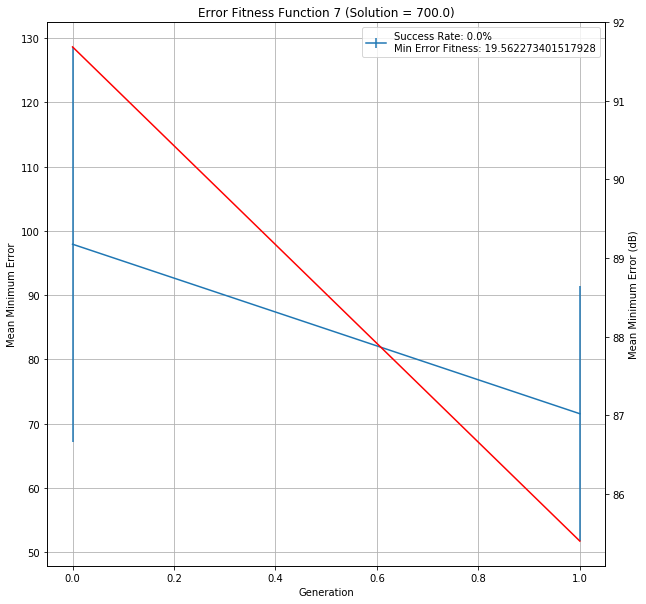

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[7_10_51_300_0.01_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,7,10,0.01,60.29636,47.488001,109.32027,57.065528,67.530618,43.8302,...,82.220317,75.788087,99.264979,60.095608,81.825404,121.114359,84.526121,71.536762,0:02:10,1200
